<a href="https://colab.research.google.com/github/wphatnathee/github-demo2/blob/main/Deep_learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 

1. ชื่อ  รหัสนักศึกษา

2. ให้ใช้ Dataset ที่ได้รับมอบหมาย โดยสรุปรายละเอียดข้อมูลที่ใช้ในการทดลอง (5 คะแนน) เช่น

    Iris dataset มี 3 คลาส  4 Attributes จำนวน 150 instances  ข้อมูลเป็นรูปแบบ จำนวนจริง ไม่มี missing value เผยแพร่ตั้งแต่ 1988-07-01 …………เป็นต้น

   นำรายละเอียดข้อมูลมากจาก

   Dua, D. and Karra Taniskidou, E. (2017). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

   (เข้าถึงข้อมูลเมื่อ 21 Feb. 2019)

3. ขั้นตอนการทำ pre processing (ถ้ามี)   อธิบายที่มาและความเหมาะสมที่เลือกใช้วิธีการดังกล่าว (10 คะแนน)

4. สมติฐานการทดลอง (40 คะแนน)

 เช่น 10-fold cross validation, train: test= 70:30

    4.1 การทดลองเพื่อทดสอบผลความถูกต้องจาก การจำแนก โดยการ preprocess

    4.2 การทดลองเพื่อทดสอบโครงสร้าง NN ที่เหมาะสม เช่น มี output layer, มี 2 hidden layer

    4.3 การทดลองเพื่อทดสอบ จำนวน node ที่เหมาะสม

    4.4 ความสัมพันธ์ระหว่างการกำหนดค่า learning rate และ จำนวน epoch

5. วิเคราะห์และสรุปผลการทดลอง , ข้อเสนอแนะในการพัฒนาต่อไป(20 คะแนน)

6. Code ที่พัฒนาขึ้น อธิบาย code ที่เขียน (เขียนเอง หรือใช้ package ก็ได้) แต่ละส่วนอธิบายโครงสร้างของโปรแกรมเบื้องต้น (**ให้เขียน comment อธิบายคำสั่งที่ใช้งาน) (25 คะแนน)

In [5]:
!git remote add origin git@github.com:wphatnathee/deeplearn.git
!git branch -M main
!git push -u origin main

fatal: remote origin already exists.
error: refname refs/heads/master not found
fatal: Branch rename failed
error: src refspec main does not match any.
error: failed to push some refs to 'git@github.com:wphatnathee/deeplearn.git'


In [ ]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# define the function
def training_vis(hist):
    loss = hist.history['loss']
    #val_loss = hist.history['val_loss']
    acc = hist.history['accuracy']
    #val_acc = hist.history['val_acc']

    # make a figure
    fig = plt.figure(figsize=(8,4))
    # subplot loss
    ax1 = fig.add_subplot(121)
    ax1.plot(loss,label='train_loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Trainingloss')
    ax1.set_title('Accuracy and Loss on Training')
    ax1.plot(acc,label='train_acc')
    ax1.legend()
    plt.tight_layout()

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Cryotherapy.xlsx')

In [ ]:
df.head()

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
0,1,35,12.00,5,1,100,0
1,1,29,7.00,5,1,96,1
2,1,50,8.00,1,3,132,0
3,1,32,11.75,7,3,750,0
4,1,67,9.25,1,1,42,0


# Data Information


---


* Number of row : 90 row 
* Number of feature : 7 features

Feature Information

*  Sex : Binary Data ,Values : Male(1): 47 row , Female(2) : 43 row
*  Age : Discrete Data ,Vales : 15 - 67 
*  Time elapsed before treatment (month)  : countrinous Data ,Value : 0 - 12
*  The number of  Warts : Discrete Data , Value :  1-12 
*  Types of wart(Count) : 1-Common(54) 2-Plantar(9) 3-both type(27)
*  Surface area of the warts (mm2) : 4 - 750 

* Result of Treatmeant : Yes(1) , No(0)





In [ ]:
df.shape

(90, 7)

In [ ]:
df.describe()

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.477778,28.600000,7.666667,5.511111,1.700000,85.833333,0.533333
std,0.502304,13.360852,3.406661,3.567155,0.905042,131.733153,0.501683
min,1.000000,15.000000,0.250000,1.000000,1.000000,4.000000,0.000000
25%,1.000000,18.000000,4.562500,2.000000,1.000000,20.000000,0.000000
50%,1.000000,25.500000,8.500000,5.000000,1.000000,70.000000,1.000000
75%,2.000000,35.000000,10.687500,8.000000,3.000000,100.000000,1.000000
max,2.000000,67.000000,12.000000,12.000000,3.000000,750.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 90 non-null     float64
 3   Number_of_Warts      90 non-null     int64  
 4   Type                 90 non-null     int64  
 5   Area                 90 non-null     int64  
 6   Result_of_Treatment  90 non-null     int64  
dtypes: float64(1), int64(6)
memory usage: 5.0 KB


In [ ]:
df.isnull().sum()

sex                    0
age                    0
Time                   0
Number_of_Warts        0
Type                   0
Area                   0
Result_of_Treatment    0
dtype: int64

In [ ]:
df['Result_of_Treatment'].value_counts()

1    48
0    42
Name: Result_of_Treatment, dtype: int64

#Data Prepairing

In [ ]:
from sklearn import preprocessing

## Categories Data

To Encode the data using dummy  

* Sex 
* Type 



In [ ]:
# Sex : 1 Male , 0 : Female
pd.get_dummies(df['sex'],prefix='Sex' )
df = df.join(pd.get_dummies(df['sex'],prefix='Sex' ))

In [ ]:
# Type : 1-Common 2-Plantar 3-both type
df = df.join(pd.get_dummies(df['Type'],prefix='Type'))

In [ ]:
df = df.drop(['sex','Type'],axis = 1)

In [ ]:
df

,age,Time,Number_of_Warts,Area,Result_of_Treatment,Sex_1,Sex_2,Type_1,Type_2,Type_3
0,35,12.00,5,100,0,1,0,1,0,0
1,29,7.00,5,96,1,1,0,1,0,0
2,50,8.00,1,132,0,1,0,0,0,1
3,32,11.75,7,750,0,1,0,0,0,1
4,67,9.25,1,42,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
85,34,12.00,3,95,0,0,1,0,0,1
86,20,3.50,6,75,1,0,1,1,0,0
87,35,8.25,8,100,0,0,1,0,0,1
88,24,10.75,10,20,1,1,0,1,0,0


## Numerical data

To tranform the data using StandardScaler 

*  Discrete Data : Number_of_Warts
*  Countinous Data : Age , Time , Area


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['age', 'Time','Number_of_Warts','Area']] = scaler.fit_transform(df[['age', 'Time','Number_of_Warts','Area']].to_numpy())

In [ ]:
df 

,age,Time,Number_of_Warts,Area,Result_of_Treatment,Sex_1,Sex_2,Type_1,Type_2,Type_3
0,0.481695,1.279144,-0.144085,0.108143,0,1,0,1,0,0
1,0.030106,-0.196791,-0.144085,0.077609,1,1,0,1,0,0
2,1.610667,0.098396,-1.271709,0.352419,0,1,0,0,0,1
3,0.255900,1.205347,0.419727,5.070003,0,1,0,0,0,1
4,2.890170,0.467380,-1.271709,-0.334607,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
85,0.406430,1.279144,-0.707897,0.069975,0,0,1,0,0,1
86,-0.647278,-1.229946,0.137821,-0.082698,1,0,1,1,0,0
87,0.481695,0.172192,0.701633,0.108143,0,0,1,0,0,1
88,-0.346218,0.910160,1.265445,-0.502547,1,1,0,1,0,0


#Split Test Train dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Result_of_Treatment',axis = 1)
y = df.loc[:,'Result_of_Treatment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
y_train.value_counts()

1    35
0    28
Name: Result_of_Treatment, dtype: int64

In [ ]:
y_test.value_counts()

0    14
1    13
Name: Result_of_Treatment, dtype: int64

In [ ]:
import tensorflow as tf
from keras.layers import Dense

model = tf.keras.Sequential()

In [ ]:
model = tf.keras.Sequential()
model.add(Dense(12, input_dim=9, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=150, batch_size=3)

Epoch 1/150
21/21 [==============================] - 1s 1ms/step - loss: 0.7009 - accuracy: 0.4661
Epoch 2/150
21/21 [==============================] - 0s 1ms/step - loss: 0.6694 - accuracy: 0.5798
Epoch 3/150
21/21 [==============================] - 0s 2ms/step - loss: 0.6293 - accuracy: 0.7683
Epoch 4/150
21/21 [==============================] - 0s 2ms/step - loss: 0.5874 - accuracy: 0.8676
Epoch 5/150
21/21 [==============================] - 0s 1ms/step - loss: 0.5894 - accuracy: 0.7332
Epoch 6/150
21/21 [==============================] - 0s 1ms/step - loss: 0.5292 - accuracy: 0.8509
Epoch 7/150
21/21 [==============================] - 0s 1ms/step - loss: 0.4754 - accuracy: 0.8989
Epoch 8/150
21/21 [==============================] - 0s 2ms/step - loss: 0.4444 - accuracy: 0.8857
Epoch 9/150
21/21 [==============================] - 0s 1ms/step - loss: 0.4380 - accuracy: 0.8223
Epoch 10/150
21/21 [==============================] - 0s 2ms/step - loss: 0.3912 - accuracy: 0.9421
Epoch 11/

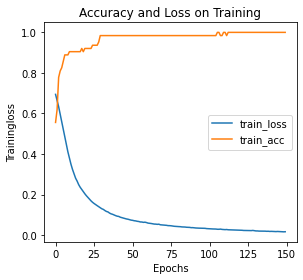

In [ ]:
training_vis(hist)

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

1/1 [==============================] - 0s 187ms/step - loss: 0.6360 - accuracy: 0.9259
Accuracy: 92.59


#Change NN layer

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Result_of_Treatment',axis = 1)
y = df.loc[:,'Result_of_Treatment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
import tensorflow as tf
from keras.layers import Dense

model = tf.keras.Sequential()

In [ ]:
# 1 Hidden layer
model1 = tf.keras.Sequential()
model1.add(Dense(12, input_dim=9, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
# compile the keras model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist1 = model1.fit(X_train, y_train, epochs=100, batch_size=3)

Epoch 1/100
21/21 [==============================] - 0s 1ms/step - loss: 0.7705 - accuracy: 0.6253
Epoch 2/100
21/21 [==============================] - 0s 1ms/step - loss: 0.8003 - accuracy: 0.5061
Epoch 3/100
21/21 [==============================] - 0s 1ms/step - loss: 0.8109 - accuracy: 0.5197
Epoch 4/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6873 - accuracy: 0.6131
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.6107
Epoch 6/100
21/21 [==============================] - 0s 1ms/step - loss: 0.7236 - accuracy: 0.5305
Epoch 7/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6436 - accuracy: 0.6249
Epoch 8/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6440 - accuracy: 0.5969
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6141 - accuracy: 0.5822
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5566 - accuracy: 0.6670
Epoch 11/

In [ ]:
# 2 Hidden Layers
model2 = tf.keras.Sequential()
model2.add(Dense(18, input_dim=9, activation='relu'))
model2.add(Dense(9, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
# compile the keras model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist2 = model2.fit(X_train, y_train, epochs=100, batch_size=3)

Epoch 1/100
21/21 [==============================] - 0s 2ms/step - loss: 0.8944 - accuracy: 0.4122
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7746 - accuracy: 0.4379
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.4582
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.4547
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.5228
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5577 - accuracy: 0.7404
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5759 - accuracy: 0.7517
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5435 - accuracy: 0.8397
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5493 - accuracy: 0.8405
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5019 - accuracy: 0.8763
Epoch 11/

In [ ]:
# 3 Hidden layers
model3 = tf.keras.Sequential()
model3.add(Dense(12, input_dim=9, activation='relu'))
model3.add(Dense(9, activation='relu'))
model3.add(Dense(9, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
# compile the keras model
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist3 = model3.fit(X_train, y_train, epochs=100, batch_size=3)

Epoch 1/100
21/21 [==============================] - 1s 2ms/step - loss: 0.7145 - accuracy: 0.3437
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.6011
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6563 - accuracy: 0.7111
Epoch 4/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6285 - accuracy: 0.8424
Epoch 5/100
21/21 [==============================] - 0s 1ms/step - loss: 0.5893 - accuracy: 0.8174
Epoch 6/100
21/21 [==============================] - 0s 1ms/step - loss: 0.5836 - accuracy: 0.8193
Epoch 7/100
21/21 [==============================] - 0s 1ms/step - loss: 0.5569 - accuracy: 0.7802
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5190 - accuracy: 0.8803
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4562 - accuracy: 0.8304
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4236 - accuracy: 0.8515
Epoch 11/

In [ ]:
# evaluate the keras model
_, accuracy1 = model1.evaluate(X_test, y_test)
print('Accuracy 1 Hidden layer : %.2f' % (accuracy1*100))

# evaluate the keras model
_, accuracy2 = model2.evaluate(X_test, y_test)
print('Accuracy 2 Hidden layers : %.2f' % (accuracy2*100))

# evaluate the keras model
_, accuracy3 = model3.evaluate(X_test, y_test)
print('Accuracy 3 Hidden layers : %.2f' % (accuracy3*100))

1/1 [==============================] - 0s 118ms/step - loss: 0.2221 - accuracy: 0.9259
Accuracy 1 Hidden layer : 92.59
1/1 [==============================] - 0s 117ms/step - loss: 0.5324 - accuracy: 0.8519
Accuracy 2 Hidden layers : 85.19
1/1 [==============================] - 0s 132ms/step - loss: 0.2898 - accuracy: 0.9259
Accuracy 3 Hidden layers : 92.59


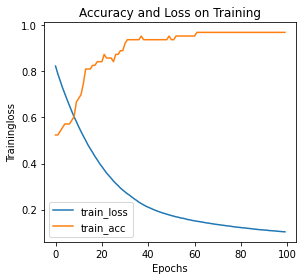

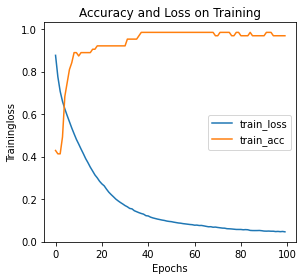

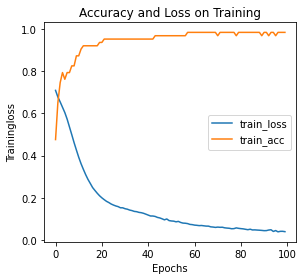

In [ ]:
training_vis(hist1)
training_vis(hist2)
training_vis(hist3)

# Learning Rate

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
opt = Adam(learning_rate=0.01)
opt1 = Adam(learning_rate=0.1)

In [ ]:
# Learning rate = 0.01 , Epoch = 100
model = tf.keras.Sequential()
model.add(Dense(12, input_dim=9, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
histl = model.fit(X_train, y_train, epochs=100, batch_size=3)

Epoch 1/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6665 - accuracy: 0.6858
Epoch 2/100
21/21 [==============================] - 0s 1ms/step - loss: 0.4572 - accuracy: 0.8293
Epoch 3/100
21/21 [==============================] - 0s 1ms/step - loss: 0.2923 - accuracy: 0.9407
Epoch 4/100
21/21 [==============================] - 0s 1ms/step - loss: 0.2178 - accuracy: 0.9125
Epoch 5/100
21/21 [==============================] - 0s 1ms/step - loss: 0.1411 - accuracy: 0.9640
Epoch 6/100
21/21 [==============================] - 0s 1ms/step - loss: 0.1744 - accuracy: 0.9344
Epoch 7/100
21/21 [==============================] - 0s 1ms/step - loss: 0.1384 - accuracy: 0.9670
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1709 - accuracy: 0.9378
Epoch 9/100
21/21 [==============================] - 0s 1ms/step - loss: 0.0848 - accuracy: 0.9818
Epoch 10/100
21/21 [==============================] - 0s 1ms/step - loss: 0.1414 - accuracy: 0.9504
Epoch 11/

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

1/1 [==============================] - 0s 117ms/step - loss: 1.1171 - accuracy: 0.8519
Accuracy: 85.19


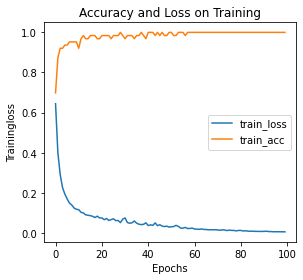

In [ ]:
training_vis(histl)

In [ ]:
# Learning rate = 0.1 , Epoch = 100
model = tf.keras.Sequential()
model.add(Dense(12, input_dim=9, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer=opt1, metrics=['accuracy'])
histl1 = model.fit(X_train, y_train, epochs=100, batch_size=3)

Epoch 1/100
21/21 [==============================] - 0s 1ms/step - loss: 0.4119 - accuracy: 0.9179
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4518 - accuracy: 0.8447
Epoch 3/100
21/21 [==============================] - 0s 1ms/step - loss: 0.1536 - accuracy: 0.9042
Epoch 4/100
21/21 [==============================] - 0s 1ms/step - loss: 0.0831 - accuracy: 0.9650
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0683 - accuracy: 0.9905
Epoch 6/100
21/21 [==============================] - 0s 1ms/step - loss: 0.1118 - accuracy: 0.9340
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1056 - accuracy: 0.9710
Epoch 8/100
21/21 [==============================] - 0s 1ms/step - loss: 0.0778 - accuracy: 0.9632
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0650 - accuracy: 0.9780
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0343 - accuracy: 0.9978
Epoch 11/

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

1/1 [==============================] - 0s 104ms/step - loss: 1.8241 - accuracy: 0.7778
Accuracy: 77.78


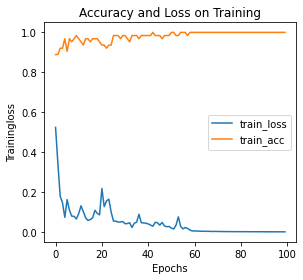

In [ ]:
training_vis(histl1)

In [ ]:
#Learning rate 0.01, Epoch = 50
model = tf.keras.Sequential()
model.add(Dense(12, input_dim=9, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
histl = model.fit(X_train, y_train, epochs=50, batch_size=3)

Epoch 1/50
21/21 [==============================] - 0s 1ms/step - loss: 0.7784 - accuracy: 0.4472
Epoch 2/50
21/21 [==============================] - 0s 1ms/step - loss: 0.2505 - accuracy: 0.8938
Epoch 3/50
21/21 [==============================] - 0s 2ms/step - loss: 0.2263 - accuracy: 0.9091
Epoch 4/50
21/21 [==============================] - 0s 1ms/step - loss: 0.1736 - accuracy: 0.9163
Epoch 5/50
21/21 [==============================] - 0s 1ms/step - loss: 0.1913 - accuracy: 0.9244
Epoch 6/50
21/21 [==============================] - 0s 1ms/step - loss: 0.1480 - accuracy: 0.9206
Epoch 7/50
21/21 [==============================] - 0s 1ms/step - loss: 0.0634 - accuracy: 0.9970
Epoch 8/50
21/21 [==============================] - 0s 1ms/step - loss: 0.1155 - accuracy: 0.9651
Epoch 9/50
21/21 [==============================] - 0s 1ms/step - loss: 0.1533 - accuracy: 0.9263
Epoch 10/50
21/21 [==============================] - 0s 1ms/step - loss: 0.1119 - accuracy: 0.9696
Epoch 11/50
21/21 [

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

1/1 [==============================] - 0s 117ms/step - loss: 0.5273 - accuracy: 0.8519
Accuracy: 85.19


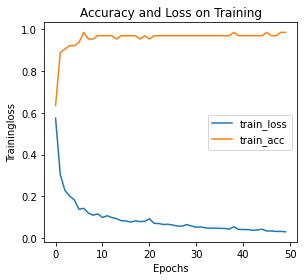

In [ ]:
training_vis(histl)

In [ ]:
#Learning rate 0.1, Epoch = 50
model = tf.keras.Sequential()
model.add(Dense(12, input_dim=9, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer=opt1, metrics=['accuracy'])
histl1 = model.fit(X_train, y_train, epochs=50, batch_size=3)

Epoch 1/50
21/21 [==============================] - 0s 1ms/step - loss: 1.5537 - accuracy: 0.6586
Epoch 2/50
21/21 [==============================] - 0s 1ms/step - loss: 0.8347 - accuracy: 0.9293
Epoch 3/50
21/21 [==============================] - 0s 1ms/step - loss: 0.3883 - accuracy: 0.9080
Epoch 4/50
21/21 [==============================] - 0s 1ms/step - loss: 0.1674 - accuracy: 0.9270
Epoch 5/50
21/21 [==============================] - 0s 1ms/step - loss: 0.1653 - accuracy: 0.8864
Epoch 6/50
21/21 [==============================] - 0s 1ms/step - loss: 0.1152 - accuracy: 0.9628
Epoch 7/50
21/21 [==============================] - 0s 1ms/step - loss: 0.1404 - accuracy: 0.9181
Epoch 8/50
21/21 [==============================] - 0s 1ms/step - loss: 0.0688 - accuracy: 0.9645
Epoch 9/50
21/21 [==============================] - 0s 2ms/step - loss: 0.0498 - accuracy: 0.9681
Epoch 10/50
21/21 [==============================] - 0s 1ms/step - loss: 0.1574 - accuracy: 0.9137
Epoch 11/50
21/21 [

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

1/1 [==============================] - 0s 16ms/step - loss: 0.8735 - accuracy: 0.8519
Accuracy: 85.19


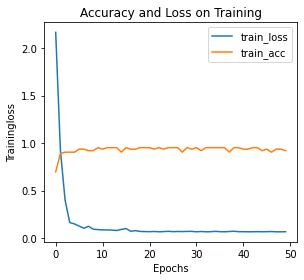

In [ ]:
training_vis(histl1)

#Grid Search

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Result_of_Treatment',axis = 1)
y = df.loc[:,'Result_of_Treatment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
import tensorflow as tf
from keras.layers import Dense
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
import time
import itertools

from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
def create_model(optimizer='adam', init='glorot_uniform'):
  
  model = tf.keras.Sequential()
  model.add(Dense(12, input_dim=9, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
    
  model.compile(
  optimizer=optimizer,
  loss='binary_crossentropy',
  metrics=['accuracy'],
  )
  
  return model

In [ ]:
model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, verbose=True)

In [ ]:
#optimizers = ['rmsprop', 'adam']
#init = ['gloroot_uniform', 'normal', 'uniform']
epochs = [50, 150, 200]
batches = [3,5,10]

#param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=init)
param_grid = dict(epochs=epochs, batch_size=batches)

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid)

In [ ]:
grid_result = grid.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
Epoch 68/200
11/11 [==============================] - 0s 3ms/step - loss: 0.1651 - accuracy: 0.9777
Epoch 69/200
11/11 [==============================] - 0s 4ms/step - loss: 0.1534 - accuracy: 0.9738
Epoch 70/200
11/11 [==============================] - 0s 3ms/step - loss: 0.2184 - accuracy: 0.9375
Epoch 71/200
11/11 [==============================] - 0s 3ms/step - loss: 0.1697 - accuracy: 0.9777
Epoch 72/200
11/11 [==============================] - 0s 3ms/step - loss: 0.1753 - accuracy: 0.9611
Epoch 73/200
11/11 [==============================] - 0s 3ms/step - loss: 0.1846 - accuracy: 0.9533
Epoch 74/200
11/11 [==============================] - 0s 5ms/step - loss: 0.1576 - accuracy: 0.9735
Epoch 75/200
11/11 [==============================] - 0s 3ms/step - loss: 0.1116 - accuracy: 0.9862
Epoch 76/200
11/11 [==============================] - 0s 2ms/step - loss: 0.1902 - accuracy: 0.9556
Epoch 77/200
11/11 [=============================

In [ ]:
print(grid_result.best_score_)
print(grid_result.best_params_)

0.9358974456787109
{'batch_size': 5, 'epochs': 150}


# Optimize Node

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Result_of_Treatment',axis = 1)
y = df.loc[:,'Result_of_Treatment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
y_train.value_counts()

1    34
0    29
Name: Result_of_Treatment, dtype: int64

In [ ]:
y_test.value_counts()

1    14
0    13
Name: Result_of_Treatment, dtype: int64

In [ ]:
import tensorflow as tf
from keras.layers import Dense

model = tf.keras.Sequential()

In [ ]:
# 12 nodes
model = tf.keras.Sequential()
model.add(Dense(12, input_dim=9, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=150, batch_size=3)

Epoch 1/150
21/21 [==============================] - 1s 2ms/step - loss: 0.7029 - accuracy: 0.6204
Epoch 2/150
21/21 [==============================] - 0s 2ms/step - loss: 0.6313 - accuracy: 0.6891
Epoch 3/150
21/21 [==============================] - 0s 2ms/step - loss: 0.6226 - accuracy: 0.6974
Epoch 4/150
21/21 [==============================] - 0s 2ms/step - loss: 0.5520 - accuracy: 0.7907
Epoch 5/150
21/21 [==============================] - 0s 2ms/step - loss: 0.5435 - accuracy: 0.7599
Epoch 6/150
21/21 [==============================] - 0s 2ms/step - loss: 0.5369 - accuracy: 0.7720
Epoch 7/150
21/21 [==============================] - 0s 2ms/step - loss: 0.4569 - accuracy: 0.8848
Epoch 8/150
21/21 [==============================] - 0s 2ms/step - loss: 0.4622 - accuracy: 0.8804
Epoch 9/150
21/21 [==============================] - 0s 2ms/step - loss: 0.4347 - accuracy: 0.9145
Epoch 10/150
21/21 [==============================] - 0s 2ms/step - loss: 0.4515 - accuracy: 0.8665
Epoch 11/

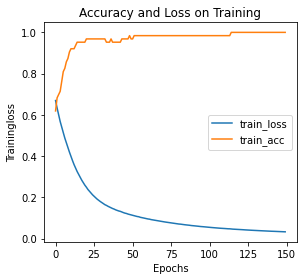

In [ ]:
training_vis(hist)

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

1/1 [==============================] - 0s 159ms/step - loss: 0.3486 - accuracy: 0.9259
Accuracy: 92.59


In [ ]:
# 20 nodes
model = tf.keras.Sequential()
model.add(Dense(20, input_dim=9, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=150, batch_size=3)

Epoch 1/150
21/21 [==============================] - 1s 2ms/step - loss: 0.8040 - accuracy: 0.3477
Epoch 2/150
21/21 [==============================] - 0s 3ms/step - loss: 0.7531 - accuracy: 0.4603
Epoch 3/150
21/21 [==============================] - 0s 3ms/step - loss: 0.6656 - accuracy: 0.6808
Epoch 4/150
21/21 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.6960
Epoch 5/150
21/21 [==============================] - 0s 2ms/step - loss: 0.5910 - accuracy: 0.6780
Epoch 6/150
21/21 [==============================] - 0s 2ms/step - loss: 0.5095 - accuracy: 0.8897
Epoch 7/150
21/21 [==============================] - 0s 2ms/step - loss: 0.4762 - accuracy: 0.9311
Epoch 8/150
21/21 [==============================] - 0s 2ms/step - loss: 0.4746 - accuracy: 0.9445
Epoch 9/150
21/21 [==============================] - 0s 2ms/step - loss: 0.4567 - accuracy: 0.8981
Epoch 10/150
21/21 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.9860
Epoch 11/

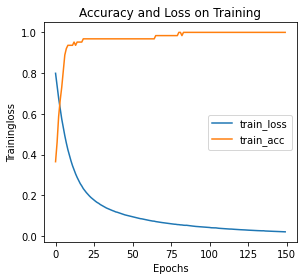

In [ ]:
training_vis(hist)

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

1/1 [==============================] - 0s 162ms/step - loss: 0.3431 - accuracy: 0.8889
Accuracy: 88.89


In [ ]:
# 40 nodes
model = tf.keras.Sequential()
model.add(Dense(40, input_dim=9, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=150, batch_size=3)

Epoch 1/150
21/21 [==============================] - 1s 2ms/step - loss: 0.7287 - accuracy: 0.4897
Epoch 2/150
21/21 [==============================] - 0s 2ms/step - loss: 0.6424 - accuracy: 0.6904
Epoch 3/150
21/21 [==============================] - 0s 2ms/step - loss: 0.5888 - accuracy: 0.7712
Epoch 4/150
21/21 [==============================] - 0s 2ms/step - loss: 0.5558 - accuracy: 0.7868
Epoch 5/150
21/21 [==============================] - 0s 2ms/step - loss: 0.5315 - accuracy: 0.7893
Epoch 6/150
21/21 [==============================] - 0s 2ms/step - loss: 0.4723 - accuracy: 0.8921
Epoch 7/150
21/21 [==============================] - 0s 2ms/step - loss: 0.4615 - accuracy: 0.8886
Epoch 8/150
21/21 [==============================] - 0s 3ms/step - loss: 0.4143 - accuracy: 0.8957
Epoch 9/150
21/21 [==============================] - 0s 2ms/step - loss: 0.3387 - accuracy: 0.9660
Epoch 10/150
21/21 [==============================] - 0s 2ms/step - loss: 0.3800 - accuracy: 0.8979
Epoch 11/

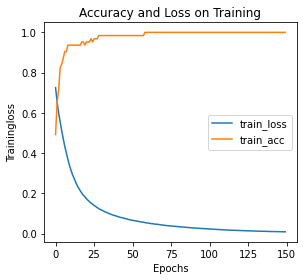

In [ ]:
training_vis(hist)

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

1/1 [==============================] - 0s 155ms/step - loss: 0.3998 - accuracy: 0.9259
Accuracy: 92.59


# Skip Preprocressing

In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Cryotherapy.xlsx')

In [ ]:
df1.head()

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
0,1,35,12.00,5,1,100,0
1,1,29,7.00,5,1,96,1
2,1,50,8.00,1,3,132,0
3,1,32,11.75,7,3,750,0
4,1,67,9.25,1,1,42,0


In [ ]:
X = df1.drop('Result_of_Treatment',axis = 1)
y = df1.loc[:,'Result_of_Treatment']

In [ ]:
X

,sex,age,Time,Number_of_Warts,Type,Area
0,1,35,12.00,5,1,100
1,1,29,7.00,5,1,96
2,1,50,8.00,1,3,132
3,1,32,11.75,7,3,750
4,1,67,9.25,1,1,42
...,...,...,...,...,...,...
85,2,34,12.00,3,3,95
86,2,20,3.50,6,1,75
87,2,35,8.25,8,3,100
88,1,24,10.75,10,1,20


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,)

In [ ]:
import tensorflow as tf
from keras.layers import Dense

model = tf.keras.Sequential()

In [ ]:
model = tf.keras.Sequential()
model.add(Dense(12, input_dim=6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
histunpre = model.fit(X_train, y_train, epochs=150, batch_size=3)

Epoch 1/150
21/21 [==============================] - 1s 2ms/step - loss: 7.0301 - accuracy: 0.6808
Epoch 2/150
21/21 [==============================] - 0s 2ms/step - loss: 8.2121 - accuracy: 0.5291
Epoch 3/150
21/21 [==============================] - 0s 2ms/step - loss: 10.0339 - accuracy: 0.6240
Epoch 4/150
21/21 [==============================] - 0s 2ms/step - loss: 3.1309 - accuracy: 0.6855
Epoch 5/150
21/21 [==============================] - 0s 2ms/step - loss: 4.5343 - accuracy: 0.4722
Epoch 6/150
21/21 [==============================] - 0s 2ms/step - loss: 3.6611 - accuracy: 0.4950
Epoch 7/150
21/21 [==============================] - 0s 2ms/step - loss: 2.1483 - accuracy: 0.4281
Epoch 8/150
21/21 [==============================] - 0s 2ms/step - loss: 3.4726 - accuracy: 0.4770
Epoch 9/150
21/21 [==============================] - 0s 2ms/step - loss: 2.8573 - accuracy: 0.3968
Epoch 10/150
21/21 [==============================] - 0s 2ms/step - loss: 1.9813 - accuracy: 0.4063
Epoch 11

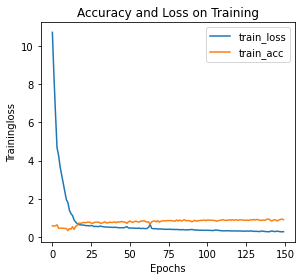

In [ ]:
training_vis(histunpre)

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

1/1 [==============================] - 0s 160ms/step - loss: 0.3588 - accuracy: 0.8519
Accuracy: 85.19


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Result_of_Treatment',axis = 1)
y = df.loc[:,'Result_of_Treatment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
y_train.value_counts()

1    34
0    29
Name: Result_of_Treatment, dtype: int64

In [ ]:
y_test.value_counts()

1    14
0    13
Name: Result_of_Treatment, dtype: int64

In [ ]:
import tensorflow as tf
from keras.layers import Dense

model = tf.keras.Sequential()

In [ ]:
model = tf.keras.Sequential()
model.add(Dense(12, input_dim=9, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=150, batch_size=3)

Epoch 1/150
21/21 [==============================] - 1s 4ms/step - loss: 0.8041 - accuracy: 0.4037
Epoch 2/150
21/21 [==============================] - 0s 2ms/step - loss: 0.6742 - accuracy: 0.5042
Epoch 3/150
21/21 [==============================] - 0s 2ms/step - loss: 0.6455 - accuracy: 0.5885
Epoch 4/150
21/21 [==============================] - 0s 3ms/step - loss: 0.6433 - accuracy: 0.4877
Epoch 5/150
21/21 [==============================] - 0s 2ms/step - loss: 0.6110 - accuracy: 0.5598
Epoch 6/150
21/21 [==============================] - 0s 2ms/step - loss: 0.5930 - accuracy: 0.6732
Epoch 7/150
21/21 [==============================] - 0s 2ms/step - loss: 0.6145 - accuracy: 0.7264
Epoch 8/150
21/21 [==============================] - 0s 2ms/step - loss: 0.5400 - accuracy: 0.8320
Epoch 9/150
21/21 [==============================] - 0s 2ms/step - loss: 0.5409 - accuracy: 0.8641
Epoch 10/150
21/21 [==============================] - 0s 2ms/step - loss: 0.5256 - accuracy: 0.7525
Epoch 11/

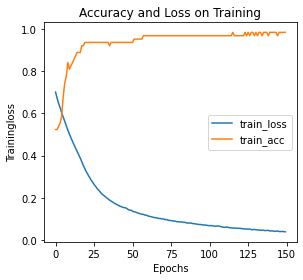

In [ ]:
training_vis(hist)

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

1/1 [==============================] - 0s 178ms/step - loss: 0.2060 - accuracy: 0.9630
Accuracy: 96.30
